In [30]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
import itertools


In [32]:
def GetFeaturesImportance(X_train, y_train, classifier,j):
    if classifier==0:
        rgr = RandomForestClassifier(n_estimators=10,random_state=j)
    if classifier==1:
        rgr = ExtraTreesClassifier(n_estimators=10, random_state=j)
    if classifier==2:
        rgr = GradientBoostingClassifier(n_estimators=10, random_state=j)
                 
    rgr.fit(X_train, y_train)
    return rgr.feature_importances_

In [33]:
def GetAllFeaturesImportance(X_train, y_train,j):
    importances = []
    for i in range (0,3):
        importances.append(GetFeaturesImportance(X_train, y_train,i,j))
    return importances
        

['(0, 0)', '(0, 1)', '(0, 2)', '(0, 3)', '(0, 4)', '(0, 5)', '(0, 6)', '(0, 7)', '(1, 0)', '(1, 1)', '(1, 2)', '(1, 3)', '(1, 4)', '(1, 5)', '(1, 6)', '(1, 7)', '(2, 0)', '(2, 1)', '(2, 2)', '(2, 3)', '(2, 4)', '(2, 5)', '(2, 6)', '(2, 7)', '(3, 0)', '(3, 1)', '(3, 2)', '(3, 3)', '(3, 4)', '(3, 5)', '(3, 6)', '(3, 7)', '(4, 0)', '(4, 1)', '(4, 2)', '(4, 3)', '(4, 4)', '(4, 5)', '(4, 6)', '(4, 7)', '(5, 0)', '(5, 1)', '(5, 2)', '(5, 3)', '(5, 4)', '(5, 5)', '(5, 6)', '(5, 7)', '(6, 0)', '(6, 1)', '(6, 2)', '(6, 3)', '(6, 4)', '(6, 5)', '(6, 6)', '(6, 7)', '(7, 0)', '(7, 1)', '(7, 2)', '(7, 3)', '(7, 4)', '(7, 5)', '(7, 6)', '(7, 7)']


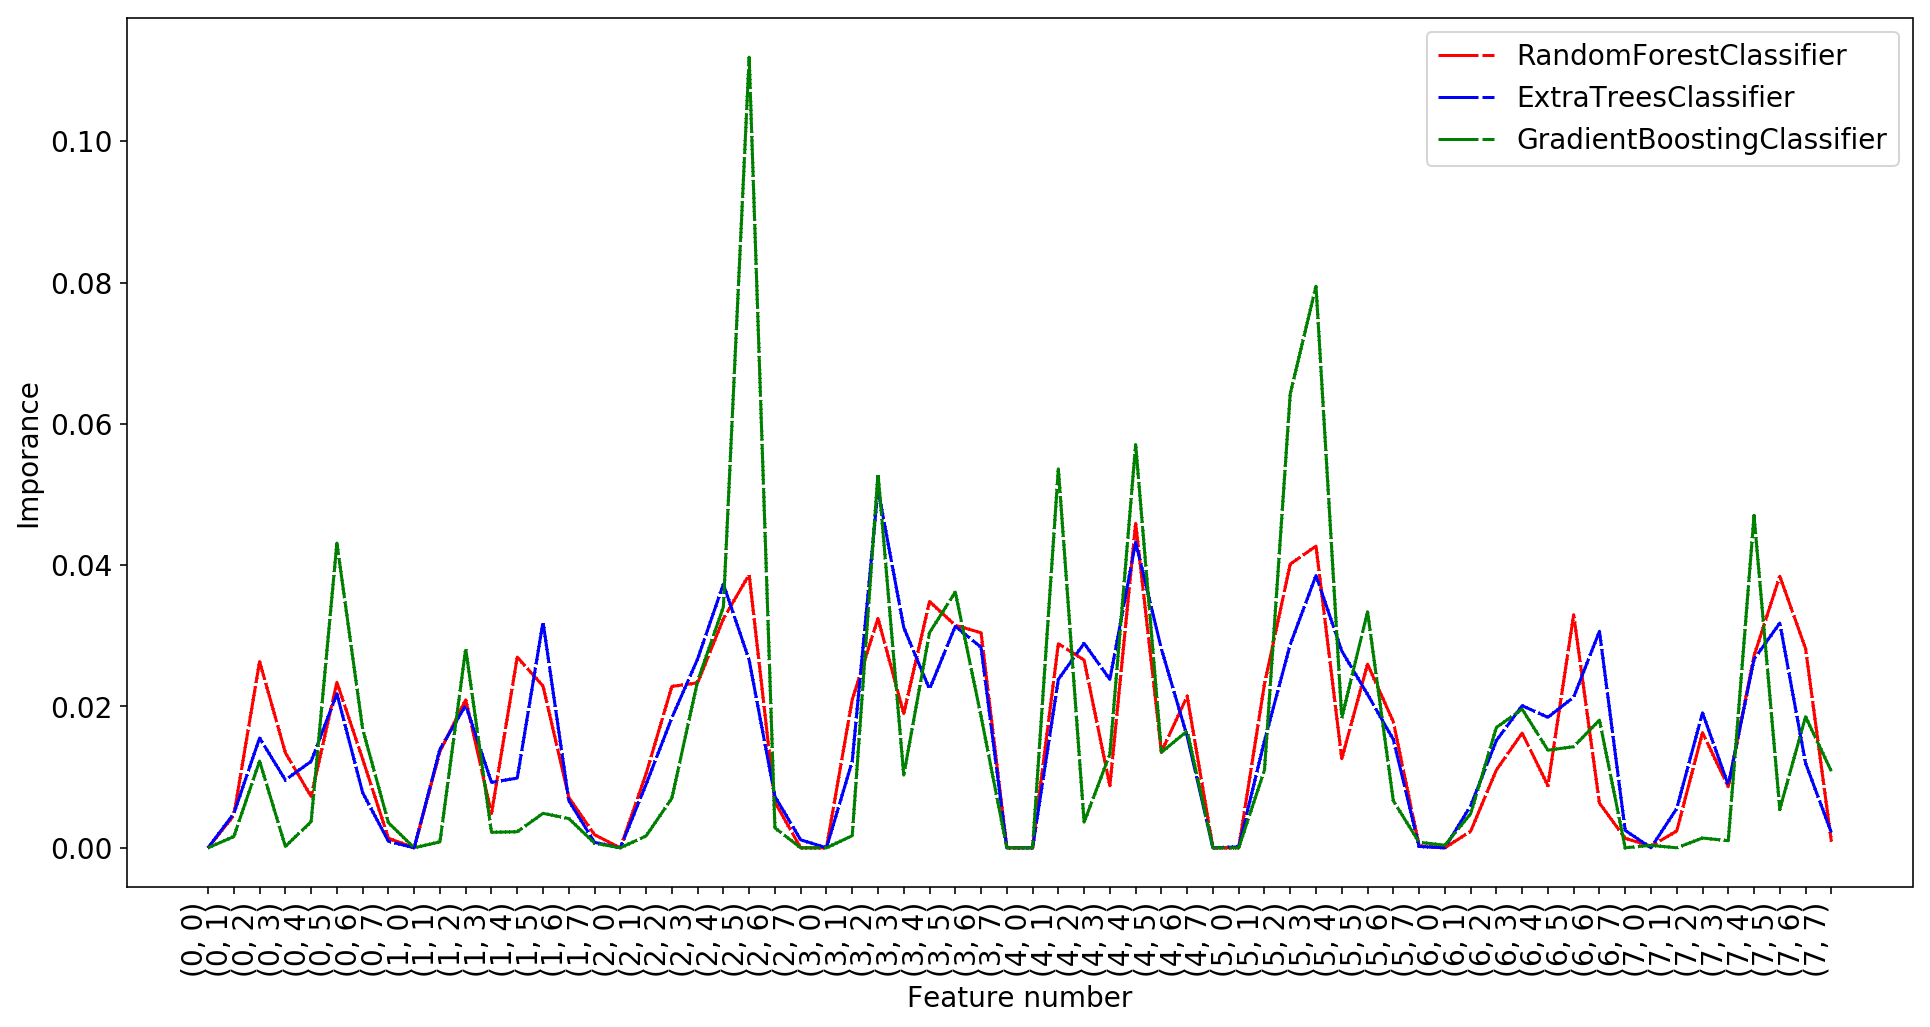

In [41]:
AverageImportance= []
features = []
for j in range (0,10):
    
    mydigits = load_digits()
    X, y = mydigits.data, mydigits.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=j)
    Importances = GetAllFeaturesImportance(X_train, y_train,j)
    AverageImportance+= Importances
    
    features=range (0, len(Importances[0]))
    plt.plot(features, AverageImportance[0], 'r--', dashes=(0.1,1)) 
    plt.plot(features, AverageImportance[1], 'b--', dashes=(0.1,1))
    plt.plot(features, AverageImportance[2], 'g--', dashes=(0.1,1))

    
    
plt.plot(features, AverageImportance[0], 'r--', dashes=(10,1),  label="RandomForestClassifier") 
plt.plot(features, AverageImportance[1], 'b--', dashes=(10,1),  label="ExtraTreesClassifier")
plt.plot(features, AverageImportance[2], 'g--', dashes=(10,1),  label="GradientBoostingClassifier")


plt.legend(loc='best')
plt.xlabel("Feature number")
plt.ylabel("Imporance")

features2D = itertools.product(np.arange(8), np.arange(8))
features2D = list(map(str, list(features2D)))

print(features2D)
plt.xticks(features, features2D, rotation=90, horizontalalignment="right");

The figure above indicate the most importance of features for each classifier as a function of location of examined pixel. Figure indicates that pixels X,0 and X,7 which are on the sides are not very importan on the other hand the central pixels liku (2,4) (2,5) (5,2) (3,3) and so on are reported to be more important. I agree with the interpretation of a classifier as the central part of the digit is in fact representing the information because picture borders are usually unimportant as they are likely to be empty